In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import OneHotEncoder
pd.set_option('display.max_columns',30)

In [2]:
pd.set_option('mode.chained_assignment', None)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
data = pd.read_csv('C:\df ml\df.csv')

In [4]:
df=data
df=df.transpose()

In [5]:
df.columns = ['name', 'model', 'price','color','fuel_type', 'car_orgin','car_license','gearbox','glass','engine_power','mileage','passengers','payment_method','displayed','previous_owners','insurance_third','supplementary_body','total','ads_status','ads_start_data','ads_end_data','alarm_device','air_conditioner','CD_recorder','sunroof','leather_upholstery','central_closing','magnesium_rims', 'air_cushion']

In [6]:
df0=df
df1=df

In [7]:
df

,name,model,price,color,fuel_type,car_orgin,car_license,gearbox,glass,engine_power,mileage,passengers,payment_method,displayed,previous_owners,insurance_third,supplementary_body,total,ads_status,ads_start_data,ads_end_data,alarm_device,air_conditioner,CD_recorder,sunroof,leather_upholstery,central_closing,magnesium_rims,air_cushion
0,كيا اوبتيما,2014,100000,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,75000,4+1,نقدا فقط,للبيع فقط,يد اولى,1340,1751,3090,NaN,NaN,NaN,1,1,1,1,1,1,1,1
1,معرض السيارات,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,معرض السيارات,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,كيا سورينتو,2007,60000,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500,130000,7+1,إمكانية التقسيط,للبيع أو التبديل,2,1690,1050,2740,NaN,NaN,NaN,1,1,1,1,1,1,1,1
4,هونداي افانتي,2006,43500,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,NaN,NaN,نقدا فقط,للبيع فقط,NaN,1340,1000,2340,NaN,NaN,NaN,1,1,1,NaN,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7772,فورد ترانزيت,2002,48000,أبيض,ديزل,عمومي,فلسطينية,عادي,الكتروني,2400,00000,7+1,نقدا فقط,للبيع فقط,5,845,500,1345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7773,بيجو بارتنر,2018,87000,فضي,ديزل,خصوصي,فلسطينية,عادي,الكتروني,1600,50000,4+1,نقدا فقط,للبيع فقط,يد صفر,1340,1523,2863,NaN,NaN,NaN,1,1,1,NaN,NaN,1,NaN,1
7774,كيا سورينتو,2017,126000,بترولي,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200,100,6+1,نقدا فقط,للبيع فقط,ثانيه,1690,2205,3895,NaN,NaN,NaN,1,1,1,1,1,1,1,1
7775,معرض السيارات,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# step 1: Data Understanding

In [8]:
df.head()

,name,model,price,color,fuel_type,car_orgin,car_license,gearbox,glass,engine_power,mileage,passengers,payment_method,displayed,previous_owners,insurance_third,supplementary_body,total,ads_status,ads_start_data,ads_end_data,alarm_device,air_conditioner,CD_recorder,sunroof,leather_upholstery,central_closing,magnesium_rims,air_cushion
0,كيا اوبتيما,2014,100000,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,75000,4+1,نقدا فقط,للبيع فقط,يد اولى,1340,1751,3090,NaN,NaN,NaN,1,1,1,1,1,1,1,1
1,معرض السيارات,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,معرض السيارات,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,كيا سورينتو,2007,60000,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500,130000,7+1,إمكانية التقسيط,للبيع أو التبديل,2,1690,1050,2740,NaN,NaN,NaN,1,1,1,1,1,1,1,1
4,هونداي افانتي,2006,43500,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,NaN,NaN,نقدا فقط,للبيع فقط,NaN,1340,1000,2340,NaN,NaN,NaN,1,1,1,NaN,1,1,1,1


In [9]:
df = df[df['name'] != 'معرض السيارات']

In [10]:
df.shape

(6864, 29)

In [11]:
df['price'] = df['price'].astype('Int64')
df['engine_power'] = df['engine_power'].astype('Int64')
df['model'] = df['model'].astype('Int64')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6864 entries, 0 to 7776
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   name                6864 non-null   object
 1   model               6864 non-null   Int64 
 2   price               6864 non-null   Int64 
 3   color               6864 non-null   object
 4   fuel_type           6864 non-null   object
 5   car_orgin           6864 non-null   object
 6   car_license         6864 non-null   object
 7   gearbox             6864 non-null   object
 8   glass               6864 non-null   object
 9   engine_power        6864 non-null   Int64 
 10  mileage             4923 non-null   object
 11  passengers          6087 non-null   object
 12  payment_method      6864 non-null   object
 13  displayed           6864 non-null   object
 14  previous_owners     5214 non-null   object
 15  insurance_third     6853 non-null   object
 16  supplementary_body  6853 non-

Most of the data are categoral 

In [13]:
df.describe()

,model,price,engine_power
count,6864.0,6864.0,6864.0
mean,2008.616259,66933.643211,1740.494755
std,8.690874,57022.973482,589.470714
min,1967.0,1111.0,106.0
25%,2005.0,36000.0,1400.0
50%,2011.0,55000.0,1600.0
75%,2015.0,83000.0,2000.0
max,2022.0,999999.0,9000.0


For numaric features :
    medel yeaer,
    price (skwed to right, most cars located after 1994.5),
    engine power(most of values are 2000 and below). 
these 3 columns treated as numaric values

In [14]:
df.describe(include='O')

,name,color,fuel_type,car_orgin,car_license,gearbox,glass,mileage,passengers,payment_method,displayed,previous_owners,insurance_third,supplementary_body,total,ads_status,ads_start_data,ads_end_data,alarm_device,air_conditioner,CD_recorder,sunroof,leather_upholstery,central_closing,magnesium_rims,air_cushion
count,6864,6864,6864,6864,6864,6864,6864,4923,6087,6864,6864,5214,6853,6853,6853,0,0,0,4621,5761,5789,1815,3585,5586,5019,5293
unique,630,26,4,6,2,3,2,1261,43,2,3,360,8,289,449,0,0,0,1,1,1,1,1,1,1,1
top,سكودا اوكتافيا,أبيض,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,100000,4+1,نقدا فقط,للبيع فقط,يد اولى,1340,1000,2340,NaN,NaN,NaN,1,1,1,1,1,1,1,1
freq,499,1446,3970,5833,6789,3623,6338,107,4847,4323,4209,505,3145,2364,1254,NaN,NaN,NaN,4621,5761,5789,1815,3585,5586,5019,5293


For categoral features :
    The most frequant car is skoda octavia with 499 frequency
    The most frequent car color is white with 1446 frequency
    The most frequent fuel type is gaz with 3970 frequency
    The most frequent gearbox is automatic with 3623 frequency
    this data show us what are the most demanded cars diteals 00

# EDA

In [15]:
df['color'].unique() #check if there is more than one form for one color

array(['أبيض عاجي ', 'سكني ', 'بيج ', 'فضي ', 'أسود ', 'بترولي ', 'أبيض ',
       'أسود ميتالك ', 'ذهبي ', 'فيراني ', 'أحمر ', 'أزرق ',
       'أزرق سماوي ', 'رمادي ', 'عدة الوان ', 'رصاصي ', 'برتقالي ',
       'أخضر ', 'بني ', 'خمري ', 'كحلي ', 'زيتي ', 'بنفسجي ', 'جيشي ',
       'أصفر ', 'كرميدي '], dtype=object)

In [16]:
df['previous_owners'].unique()

array(['يد اولى ', '2 ', nan, '00  ', '0 ', '1 ', 'يد ثانية ', '4 ',
       'يد ثانيه ', '3 ', 'ثالثة ', 'غير منمر استيراد الماني ', '00 ',
       'غير منمرة ', 'أولى ', '٨ ', 'يد اولا ', 'يد ثالثة ', 'يد ثالثة  ',
       'ثانية ', 'يد أولى ', 'يد سادسة ', '5 ', 'اولى  ', 'صفر ', '9 ',
       '0000 ', 'رابعه ', 'يد أولى  ', '٤ ', 'يد رابعة  ', '٢ ',
       'يد ثالثه ', '6 ', 'يد اولى  ', '7 ', '... ', 'يد ثانيه  ',
       'يد أولى استيراد ', 'يد اولي 1 ', 'اولى ', '...... ', 'ثانيه ',
       'واحد ', 'اربعة ', 'اولا ', '٣ ', 'غير منمره ', 'يد تالته ', '٦ ',
       'يد رابعه ', 'يد ثالثة ( فتيات) ', '159000 ', '12 ', '- ',
       'مش منمر ', '0 مستورده ', 'يد تانيه ', '10 ', 'يد 1 ', 'مستورد ',
       'يد 4 ', 'يد رابعة ', '00000 ', '١ ', 'استيراد مباشر من كوريا  ',
       'يد خامسة ', '٥ ', 'يد 5 ', '******** ', 'نعم ', 'مش منمرة  ',
       'يد 3 ', ' يد ثانيه ', 'يداولى ', '4  ', 'يد أولى وكالة ',
       'يد خامسه ', 'يد ثانية  ', '٩ ', '٧ ', 'يدو اولى ', 'للبيع  ',
       '8 ', 'يد و

In [17]:
previous_owner_dict = {
    '0': ['0', '٠', 'صفر', 'صفرض', 'صفرر', 'لا شيء ','Zero','O'],
    '1': ['1', 'أولى', 'اولى', 'اولا', 'واحد', 'اول', 'ياولى', 'اوله', 'انا','اولي', 'واله', 'ولا', 'واحدة', 'أولئ', 'ولى',
          'أولي', 'اولئ', 'اولة', 'اةلي', '١', 'ا'],
    '2': ['2', 'تانيه', 'ثني', 'تاني', 'ثاتيه', 'تانية', 'ثاني', 'ثانبه', 'تانبه', 'ثانيا',
          'يانيه', 'ثانية', 'ثانيه', 'اثنان', '٢'],
    '3': ['3', 'ثالثة', 'ثالثه', 'تالثه', 'تالته', 'ثالث', 'التالته', '٣'],
    '4': ['4', 'اربعه', 'رابعه', 'اربعة', 'رابعة', '٤'],
    '5': ['5', 'خامسة', 'خامسه', 'خامساً', 'خمسة', 'خمسه', '٥']
}

def _previous_owner_number(previous_owner) -> int:
    """Find whether the value exists in previous_owner_dict,
        will return the number related if it exists.

    Args:
        previous_owner: contains previous owner of car

    Returns:
        int: number of previous owner from 0 to 5
    """
    if isinstance(previous_owner, str):
        # If the value is already a string, use it directly
        value_to_check = previous_owner
    else:
        # If the value is not a string, convert it to a string
        value_to_check = str(previous_owner)

    for previous_owner_id, values in previous_owner_dict.items():
        for item in values:
            if item in value_to_check:
                return int(previous_owner_id)
            
df['previous_owners'] = df['previous_owners'].apply(_previous_owner_number)

In [18]:
df['previous_owners'].unique()

array([ 1.,  2., nan,  0.,  4.,  3.,  5.])

In [19]:
df['previous_owners'].isna().sum()

1951

In [20]:
df['passengers'].unique()

array(['4+1 ', '7+1 ', nan, '4+1  ', '5+1 ', '٤+١ ', '8 ', '6+1 ', '4+١ ',
       '٧ ', '7,+ 1 ', '7:1 ', '1+7 ', '١+٤ ', '2+1 ', '6+١ ', '+1 ',
       '6±١ ', '22 ', '1+1 ', '٥+١ ', '٧+1 ', '5+2 ', 'مثال: 4 + 1 ',
       '7.1 ', '7 =1 ', '٧+١ ', '1+2 ', '6x1     ', '1+٤ ', '4+1   ',
       '2/1 ', '8+1 ', '٨+١ ', '٦+١ ', '2 ', '4+2 ', '1٠4 ', '4\\١ ',
       '000 ', '3+1 ', '1 ', 'اكثر من 10 ', '9+1 '], dtype=object)

In [21]:
df['passengers'] = df['passengers'].astype('str')

In [22]:
df['passengers'] = df['passengers'].str.strip()

In [23]:
equivalent_formats={
    '1+7':'8',
    '7:1':'8',
    '٧+1':'8',
    '7,+ 1':'8',
    '7+1':'8',
    '٧':'7',
    '6+1':'7',
    '6±١':'7',
    '6+١':'7',
    '5+2':'7',
    '4+١':'5',
    '١+٤':'5',
    '٤+١':'5',
    '4+1':'5',
    'مثال: 4 + 1': '5',
    '5+1':'6',
    '٥+١':'6',
    '4+2':'6',
    '1+1':'2',
    '22':'4',
    '+1':'1',
    '2+1':'3',
    '2/1':'3',
    '1+2':'3',
    '٦+١':'7',
    '٨+١':'9',
    '8+1':'9',
    '6x1+٤':'10',
    '٧+١':'8',
    '7 =1':'8',
    '7.1':'8',
    '9+1':'10',
    'اكثر من 10':'10',
    '3+1':'4',
    '000':'5',
    '4\\١':'5',
    '1٠4':'5',
    '6x1':'7',
    '1+٤':'5',
    '8':'8',
    '2':'2',
    '1':'1'
}
df['passengers'] = df['passengers'].replace(equivalent_formats)

In [24]:
df['passengers'].value_counts()

passengers
5      4914
nan     777
7       624
8       179
3       110
6        94
4        77
2        49
9        18
10       12
1        10
Name: count, dtype: int64

In [25]:
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')
df['mileage']

0         75000.0
3        130000.0
4             NaN
6             NaN
7         38000.0
          ...    
7771     130000.0
7772          0.0
7773      50000.0
7774        100.0
7776    7686866.0
Name: mileage, Length: 6864, dtype: float64

In [26]:
df['mileage'].value_counts()

mileage
0.0          401
100000.0     107
200000.0     103
50000.0       75
75000.0       69
            ... 
25.0           1
152000.0       1
450.0          1
22.0           1
7686866.0      1
Name: count, Length: 719, dtype: int64

In [27]:
df

,name,model,price,color,fuel_type,car_orgin,car_license,gearbox,glass,engine_power,mileage,passengers,payment_method,displayed,previous_owners,insurance_third,supplementary_body,total,ads_status,ads_start_data,ads_end_data,alarm_device,air_conditioner,CD_recorder,sunroof,leather_upholstery,central_closing,magnesium_rims,air_cushion
0,كيا اوبتيما,2014,100000,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,75000.0,5,نقدا فقط,للبيع فقط,1.0,1340,1751,3090,NaN,NaN,NaN,1,1,1,1,1,1,1,1
3,كيا سورينتو,2007,60000,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500,130000.0,8,إمكانية التقسيط,للبيع أو التبديل,2.0,1690,1050,2740,NaN,NaN,NaN,1,1,1,1,1,1,1,1
4,هونداي افانتي,2006,43500,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,NaN,nan,نقدا فقط,للبيع فقط,NaN,1340,1000,2340,NaN,NaN,NaN,1,1,1,NaN,1,1,1,1
6,فيات 127,1982,5500,بيج,بنزين,خصوصي,فلسطينية,عادي,يدوي,906,NaN,5,إمكانية التقسيط,للبيع فقط,0.0,467,500,967,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
7,بيجو 208,2014,54000,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200,38000.0,5,نقدا فقط,للبيع فقط,NaN,1035,1000,2035,NaN,NaN,NaN,1,1,NaN,NaN,NaN,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7771,كيا مورننغ,2015,45000,فيراني,كهرباء,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1000,130000.0,5,إمكانية التقسيط,للبيع فقط,2.0,935,1000,1935,NaN,NaN,NaN,1,1,NaN,NaN,NaN,1,1,1
7772,فورد ترانزيت,2002,48000,أبيض,ديزل,عمومي,فلسطينية,عادي,الكتروني,2400,0.0,8,نقدا فقط,للبيع فقط,5.0,845,500,1345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7773,بيجو بارتنر,2018,87000,فضي,ديزل,خصوصي,فلسطينية,عادي,الكتروني,1600,50000.0,5,نقدا فقط,للبيع فقط,0.0,1340,1523,2863,NaN,NaN,NaN,1,1,1,NaN,NaN,1,NaN,1
7774,كيا سورينتو,2017,126000,بترولي,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200,100.0,7,نقدا فقط,للبيع فقط,1.0,1690,2205,3895,NaN,NaN,NaN,1,1,1,1,1,1,1,1


In [28]:
df.isna().sum()

name                     0
model                    0
price                    0
color                    0
fuel_type                0
car_orgin                0
car_license              0
gearbox                  0
glass                    0
engine_power             0
mileage               2722
passengers               0
payment_method           0
displayed                0
previous_owners       1951
insurance_third         11
supplementary_body      11
total                   11
ads_status            6864
ads_start_data        6864
ads_end_data          6864
alarm_device          2243
air_conditioner       1103
CD_recorder           1075
sunroof               5049
leather_upholstery    3279
central_closing       1278
magnesium_rims        1845
air_cushion           1571
dtype: int64

Dropping usless columns:

In [29]:
df.drop(columns=['ads_status','ads_start_data','ads_end_data','displayed'], inplace=True) #useless columns

In [30]:
df.drop(columns=['insurance_third', 'supplementary_body', 'total'], inplace=True)

# Handling missing data:

In [31]:
columns_to_fill = ['alarm_device', 'air_conditioner', 'CD_recorder', 'sunroof', 'leather_upholstery',
                   'air_cushion', 'central_closing', 'magnesium_rims']

df[columns_to_fill] = df[columns_to_fill].fillna(0)

In [32]:
mode_value= df['passengers'].mode()[0]
df['passengers'] = df['passengers'].replace([np.nan, 'nan'],mode_value )

In [33]:
df.isna().sum()

name                     0
model                    0
price                    0
color                    0
fuel_type                0
car_orgin                0
car_license              0
gearbox                  0
glass                    0
engine_power             0
mileage               2722
passengers               0
payment_method           0
previous_owners       1951
alarm_device             0
air_conditioner          0
CD_recorder              0
sunroof                  0
leather_upholstery       0
central_closing          0
magnesium_rims           0
air_cushion              0
dtype: int64

In [34]:
df['previous_owners']=df['previous_owners'].fillna(df['previous_owners'].mode()[0])#fill with the most frequent value

In [35]:
df['mileage'] = df['mileage'].fillna(df['mileage'].median())

# Remove outliers

In [36]:
def outliers(dataframe,ft):
        Q1=dataframe[ft].quantile(0.25)
        Q3=dataframe[ft].quantile(0.75)
        IQR=Q3-Q1
        
        lower_bound=Q1-1.5*IQR
        upper_bound=Q3+1.5*IQR
        
        ls=dataframe.index[(dataframe[ft]<lower_bound)|(dataframe[ft]>upper_bound)]
        return ls
index_list=[]
for feature in['engine_power','mileage','model','price']:
    index_list.extend(outliers(df,feature))
    
    
def remove (dataframe,ls):
    ls=sorted(set(ls))
    dataframe=dataframe.drop(ls)
    return dataframe

df=remove(df,index_list)

# Correlations

For categoral data:

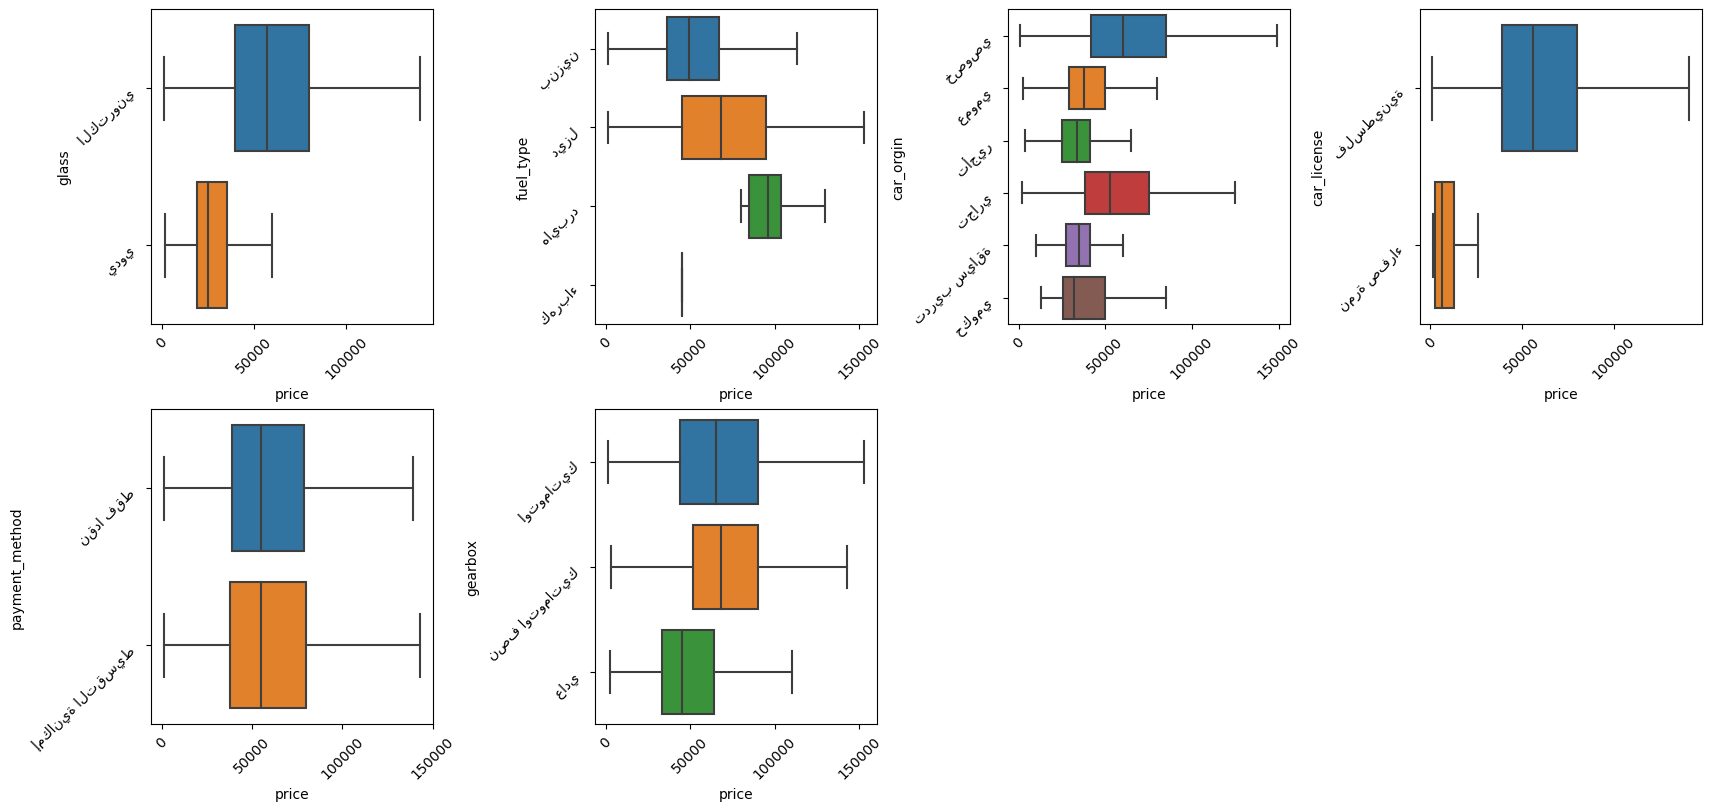

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

display_data = df.copy()
fig, axs = plt.subplots(2, 4, figsize=(17, 8), constrained_layout = True)

sns.boxplot( x=display_data["price"],y=display_data["glass"], ax=axs[0, 0], showfliers=False).tick_params(axis='both', rotation=45)
sns.boxplot( x=display_data["price"],y=display_data["fuel_type"], ax=axs[0, 1], showfliers=False).tick_params(axis='both', rotation=45)
sns.boxplot( x=display_data["price"],y=display_data["car_orgin"], ax=axs[0, 2], showfliers=False).tick_params(axis='both', rotation=45)
sns.boxplot( x=display_data["price"],y=display_data["car_license"], ax=axs[0, 3], showfliers=False).tick_params(axis='both', rotation=45)
sns.boxplot( x=display_data["price"],y=display_data["payment_method"], ax=axs[1,0], showfliers=False).tick_params(axis='both', rotation=45)
sns.boxplot( x=display_data["price"],y=display_data["gearbox"], ax=axs[1, 1], showfliers=False).tick_params(axis='both', rotation=45)
fig.delaxes(axs[1,2])
fig.delaxes(axs[1,3])

plt.show()

For numaric data

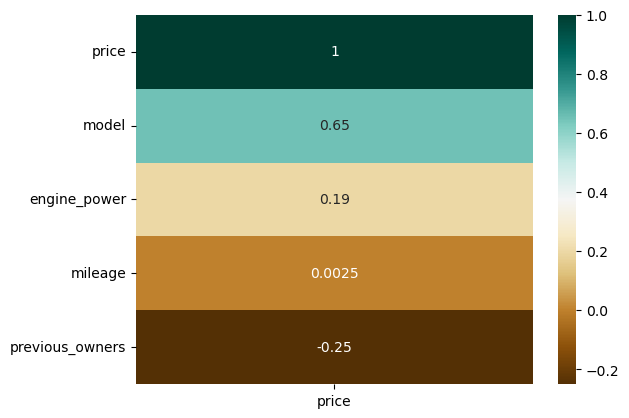

In [38]:
#All features with Price
heatmap = sns.heatmap(df.select_dtypes(exclude='object').corr()[['price']].\
    sort_values(by='price', ascending=False), annot=True, cmap='BrBG')

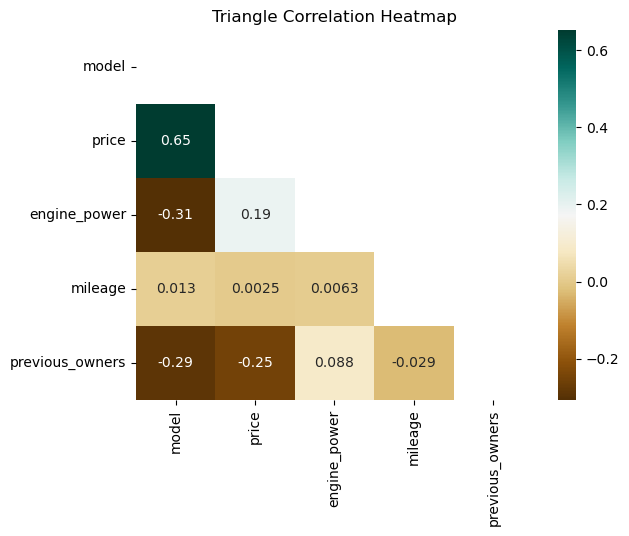

In [39]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Display the correlation between all features
mask = np.triu(np.ones_like(df.select_dtypes(exclude='object').corr()))
heatmap = sns.heatmap(df.select_dtypes(exclude='object').corr(), mask=mask,\
    annot=True, cmap='BrBG').set_title('Triangle Correlation Heatmap')
plt.show()

* model - previous owner: when the model increase (the model year gets more recent), the previous owners number will decrease.

* price - model : when the model is more recent the price increase (high correlation)

* price - previous owners: when the number of previous owner increase, the price decrease

* price - mileage: when the mileage value increse, the price decrease

* price - engine power: when the engine power increase, the price increase

Now we can see what are the values that affect the price more

# Visualising features 

for categoral columns

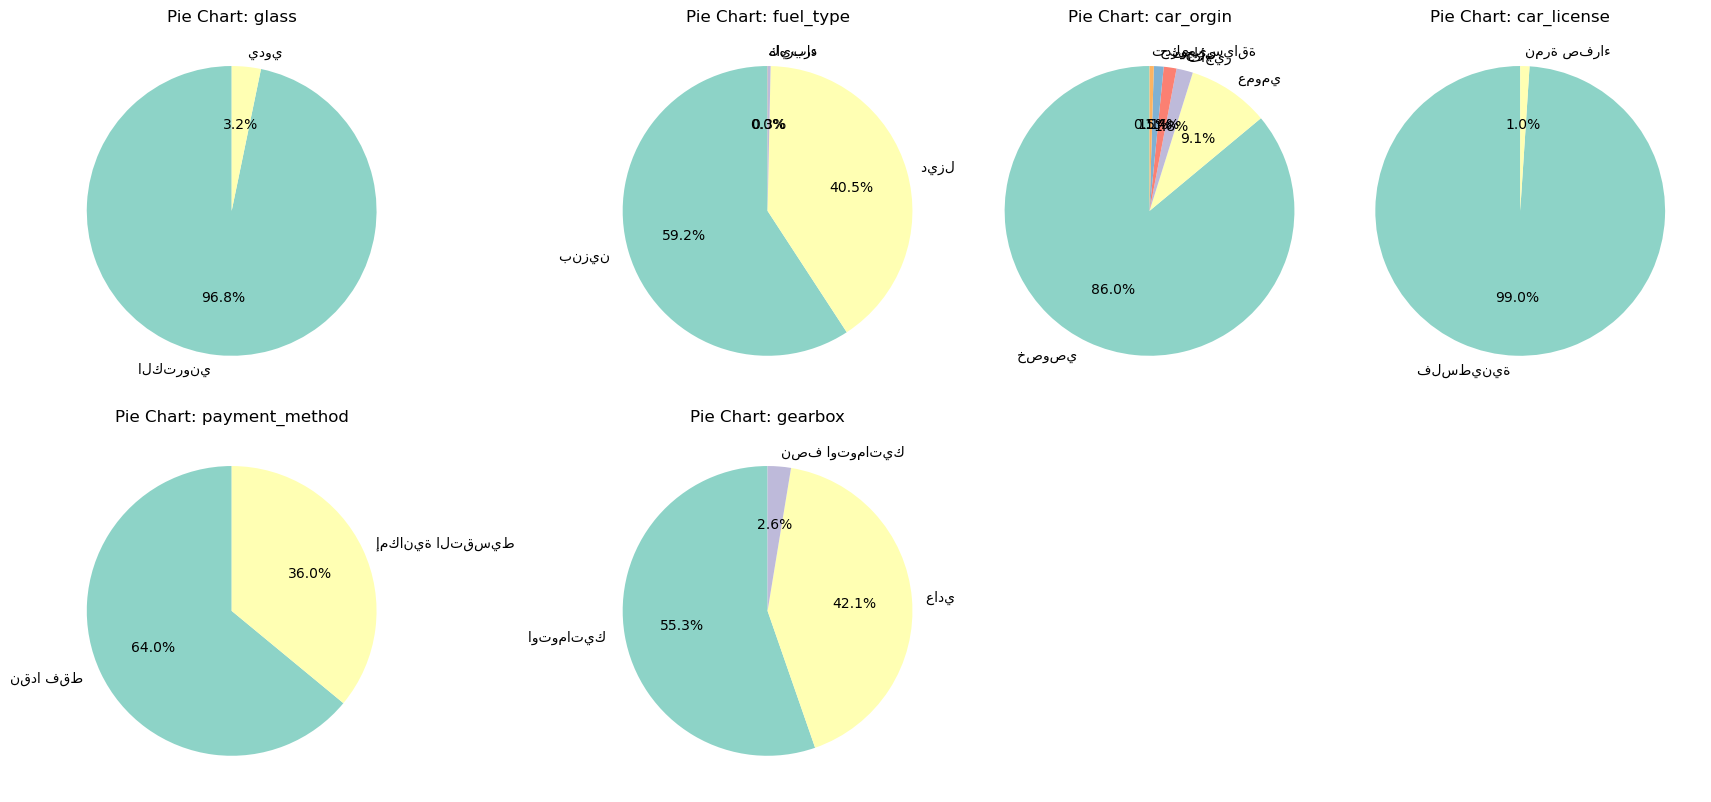

In [40]:
fig, axs = plt.subplots(2, 4, figsize=(17, 8), constrained_layout=True)

categorical_columns = ['glass', 'fuel_type', 'car_orgin', 'car_license', 'payment_method', 'gearbox']

for i, column_name in enumerate(categorical_columns):
    values = display_data[column_name].value_counts()
    axs[i // 4, i % 4].pie(values, labels=values.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
    axs[i // 4, i % 4].set_title(f'Pie Chart: {column_name}')

fig.delaxes(axs[1,2])
fig.delaxes(axs[1,3])

plt.show()

for numeric columns

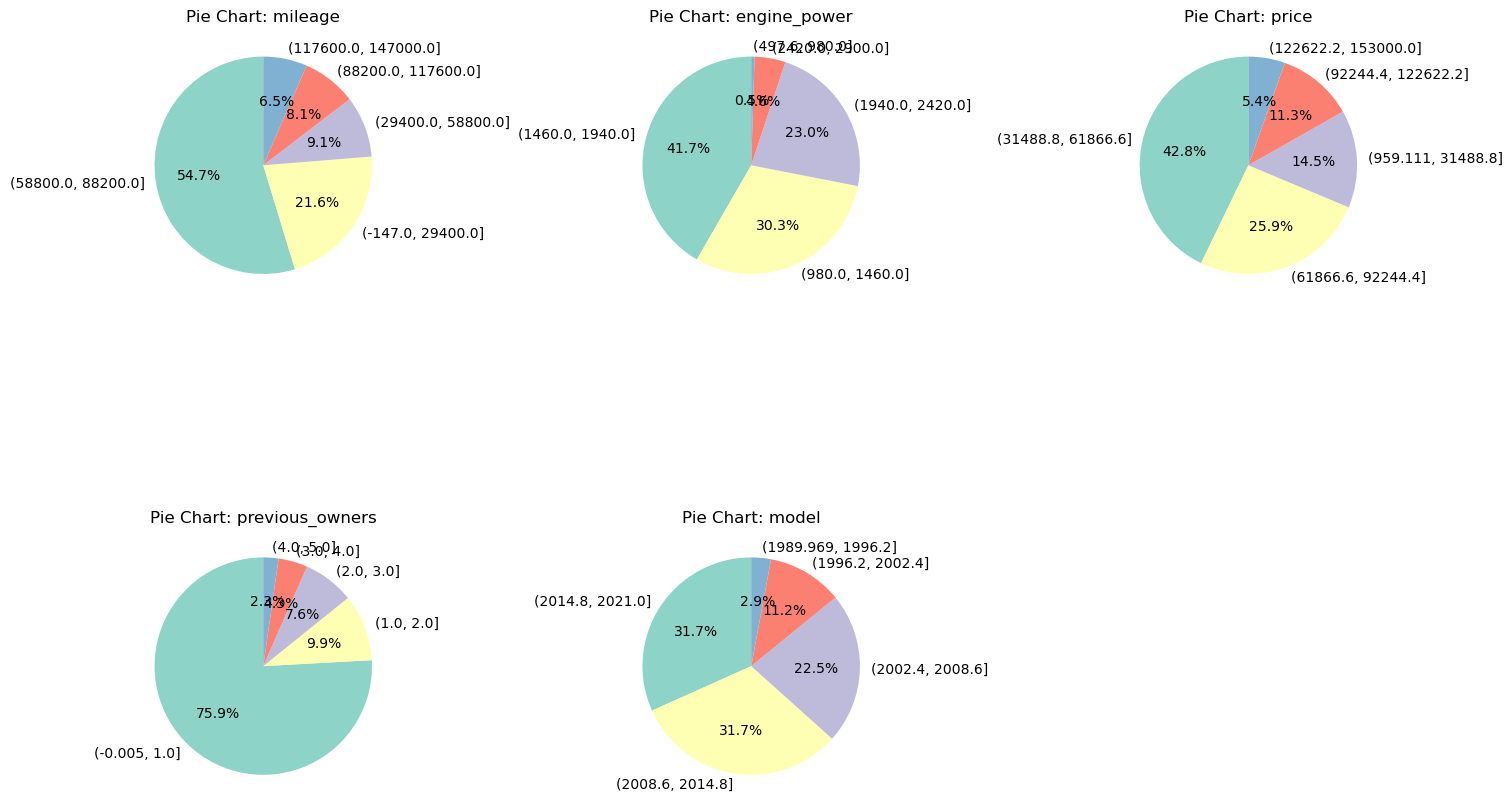

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

numeric_columns = ['mileage', 'engine_power', 'price', 'previous_owners', 'model']
num_subplots = len(numeric_columns)

fig, axs = plt.subplots(2, 3, figsize=(15, 10), constrained_layout=True)

axs = axs.flatten()

for i, column_name in enumerate(numeric_columns):
    bins = pd.cut(df[column_name], bins=5)
    values = bins.value_counts()

    axs[i].pie(values, labels=values.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
    axs[i].set_title(f'Pie Chart: {column_name}')

for i in range(num_subplots, 2 * min(3, num_subplots)):
    fig.delaxes(axs[i])

plt.show()


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5052 entries, 0 to 7774
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                5052 non-null   object 
 1   model               5052 non-null   Int64  
 2   price               5052 non-null   Int64  
 3   color               5052 non-null   object 
 4   fuel_type           5052 non-null   object 
 5   car_orgin           5052 non-null   object 
 6   car_license         5052 non-null   object 
 7   gearbox             5052 non-null   object 
 8   glass               5052 non-null   object 
 9   engine_power        5052 non-null   Int64  
 10  mileage             5052 non-null   float64
 11  passengers          5052 non-null   object 
 12  payment_method      5052 non-null   object 
 13  previous_owners     5052 non-null   float64
 14  alarm_device        5052 non-null   object 
 15  air_conditioner     5052 non-null   object 
 16  CD_recorder

In [43]:
categorical_columns = ['name','color','fuel_type','car_orgin','car_license','gearbox','payment_method', 'alarm_device', 'air_conditioner', 'CD_recorder', 'sunroof', 'leather_upholstery', 'central_closing', 'magnesium_rims', 'air_cushion']
df[categorical_columns] = df[categorical_columns].astype(str)

df_categorical = df[categorical_columns]

encoder = OneHotEncoder()

encoded_data = encoder.fit_transform(df_categorical).toarray()

df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

df = pd.concat([df, df_encoded], axis=1).drop(categorical_columns, axis=1)


In [44]:
df

,model,price,glass,engine_power,mileage,passengers,previous_owners,name_أفيكو 2000,name_أفيكو 50C13,name_أفيكو 65C18,name_أفيكو c15,name_أفيكو ديلي,name_الفا روميو 2014 جوليتا,name_اوبل موكا,name_اوبل إنسيجنيا,...,alarm_device_1,air_conditioner_0,air_conditioner_1,CD_recorder_0,CD_recorder_1,sunroof_0,sunroof_1,leather_upholstery_0,leather_upholstery_1,central_closing_0,central_closing_1,magnesium_rims_0,magnesium_rims_1,air_cushion_0,air_cushion_1
0,2014,100000,الكتروني,2000,75000.0,5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2007,60000,الكتروني,2500,130000.0,8,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006,43500,الكتروني,1600,70000.0,5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2014,54000,الكتروني,1200,38000.0,5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,65000,الكتروني,1400,70000.0,5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,<NA>,<NA>,NaN,<NA>,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
5048,<NA>,<NA>,NaN,<NA>,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
5049,<NA>,<NA>,NaN,<NA>,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5050,<NA>,<NA>,NaN,<NA>,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [189]:
def convert_float_columns_to_int(df):
    float_columns = df.select_dtypes(include=['float']).columns
    df[float_columns] = df[float_columns].astype(int)

In [190]:
df.to_csv('C:\df ml\df1.csv', index=False)